<a href="https://colab.research.google.com/github/renanwta/IDEB/blob/main/An%C3%A1lise_dados_Notas_Ideb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Índice de Desenvolvimento da Educação Básica (Ideb)


In [75]:
# Para importação de dados
import pandas as pd
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import scipy.stats as stats


In [2]:
# Para trazer os dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#   1 - Importando os dados



Fazer um estudo apra observar se há uma diferença nas notas do INEP entre as escolas publicas, estaduais, municipais e Particulares

Observar também se há uma diferença de notas em cada ano ou se ao longo do ano as medias abaixando ou aumentam.

https://basedosdados.org/dataset/96eab476-5d30-459b-82be-f888d4d0d6b9?table=bc84dea9-1126-4423-86d2-8835e6b19a72

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Portifólio collab/Datasets/brasil.csv',sep = ',')

In [4]:
dados

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,estadual,fundamental,finais (6-9),76.3,0.763635,232.86,226.60,4.324370,3.3,NaN
1,2005,estadual,fundamental,iniciais (1-5),85.5,0.863753,181.13,172.19,4.551878,3.9,NaN
2,2005,estadual,medio,todos (1-4),70.5,0.747708,260.02,248.69,4.064599,3.0,NaN
3,2005,municipal,fundamental,finais (6-9),73.2,0.740564,228.44,222.53,4.182879,3.1,NaN
4,2005,municipal,fundamental,iniciais (1-5),78.1,0.795953,174.86,165.07,4.302433,3.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
121,2021,privada,fundamental,finais (6-9),98.6,0.986248,292.52,288.82,6.355667,6.3,NaN
122,2021,total,medio,todos (1-4),90.8,0.900923,271.00,275.97,4.626981,4.2,NaN
123,2021,estadual,medio,todos (1-4),89.8,0.894545,262.37,269.54,4.409516,3.9,NaN
124,2021,pública,medio,todos (1-4),89.8,0.893798,262.71,269.79,4.418034,3.9,NaN


# 2 -  Conhencendo os dados



In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          126 non-null    int64  
 1   rede                         126 non-null    object 
 2   ensino                       126 non-null    object 
 3   anos_escolares               126 non-null    object 
 4   taxa_aprovacao               126 non-null    float64
 5   indicador_rendimento         126 non-null    float64
 6   nota_saeb_matematica         126 non-null    float64
 7   nota_saeb_lingua_portuguesa  126 non-null    float64
 8   nota_saeb_media_padronizada  126 non-null    float64
 9   ideb                         126 non-null    float64
 10  projecao                     98 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.0+ KB


In [6]:

filtro1 = dados[(dados['ano'] == 2005)]
filtro1

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,estadual,fundamental,finais (6-9),76.3,0.763635,232.86,226.60,4.324370,3.3,NaN
1,2005,estadual,fundamental,iniciais (1-5),85.5,0.863753,181.13,172.19,4.551878,3.9,NaN
2,2005,estadual,medio,todos (1-4),70.5,0.747708,260.02,248.69,4.064599,3.0,NaN
3,2005,municipal,fundamental,finais (6-9),73.2,0.740564,228.44,222.53,4.182879,3.1,NaN
4,2005,municipal,fundamental,iniciais (1-5),78.1,0.795953,174.86,165.07,4.302433,3.4,NaN
5,2005,privada,fundamental,finais (6-9),94.5,0.944993,293.54,275.50,6.150795,5.8,NaN
6,2005,privada,fundamental,iniciais (1-5),97.1,0.967712,226.13,211.41,6.123613,5.9,NaN
7,2005,privada,medio,todos (1-4),92.7,0.933066,333.30,306.88,5.964842,5.6,NaN
8,2005,publica,fundamental,finais (6-9),75.0,0.753133,231.61,225.41,4.283965,3.2,NaN
9,2005,publica,fundamental,iniciais (1-5),80.0,0.812696,177.08,167.58,4.390365,3.6,NaN


# 3 - Validação dos dados


## 3.1 Observando se existe dados nulos

In [7]:
# Obersrvando se há dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          126 non-null    int64  
 1   rede                         126 non-null    object 
 2   ensino                       126 non-null    object 
 3   anos_escolares               126 non-null    object 
 4   taxa_aprovacao               126 non-null    float64
 5   indicador_rendimento         126 non-null    float64
 6   nota_saeb_matematica         126 non-null    float64
 7   nota_saeb_lingua_portuguesa  126 non-null    float64
 8   nota_saeb_media_padronizada  126 non-null    float64
 9   ideb                         126 non-null    float64
 10  projecao                     98 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.0+ KB


In [8]:
for col in dados.columns:
  print(f'Coluna {col}')
  print(dados[col].unique())
  print("--"*30)

Coluna ano
[2005 2007 2009 2011 2013 2015 2017 2019 2021]
------------------------------------------------------------
Coluna rede
['estadual' 'municipal' 'privada' 'publica' 'total' 'pública']
------------------------------------------------------------
Coluna ensino
['fundamental' 'medio']
------------------------------------------------------------
Coluna anos_escolares
['finais (6-9)' 'iniciais (1-5)' 'todos (1-4)']
------------------------------------------------------------
Coluna taxa_aprovacao
[76.3 85.5 70.5 73.2 78.1 94.5 97.1 92.7 75.  80.  70.6 77.  81.6 78.7
 88.  71.6 77.6 83.5 95.1 97.4 93.8 78.2 84.6 71.8 79.8 85.8 74.1 80.5
 91.1 73.5 78.6 86.2 94.6 97.6 93.3 79.7 87.3 73.7 81.3 88.5 75.9 82.3
 93.1 81.1 89.4 97.7 93.4 81.8 90.2 75.2 83.4 91.2 77.4 85.1 94.7 78.
 82.  97.8 83.7 91.8 80.1 85.3 94.8 82.8 91.6 95.3 98.1 84.1 92.2 85.7
 93.2 81.7 86.8 95.6 81.2 84.2 92.5 96.5 98.6 95.7 93.  81.4 87.1 94.
 83.1 90.  96.3 84.5 93.9 98.8 96.4 88.6 94.3 84.7 89.9 86.1 97.2 97.

Nesse caso existem dados nulos na coluna de projeção, porém como não será utilziado essa coluna ela é irrelevante

## 3.2 Observar a presença de Outliers

Foi utilizado gráfico com boxplot e histigrama para observar se há outliers

In [9]:
dados.rede.unique()

array(['estadual', 'municipal', 'privada', 'publica', 'total', 'pública'],
      dtype=object)

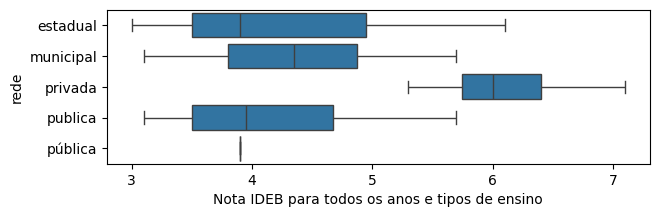

In [10]:
plt.figure(figsize =(7,2))
ax = sns.boxplot( x = 'ideb',data = dados.query('rede != "total"'),y = 'rede')
ax.set_xlabel('Nota IDEB para todos os anos e tipos de ensino')

plt.show()

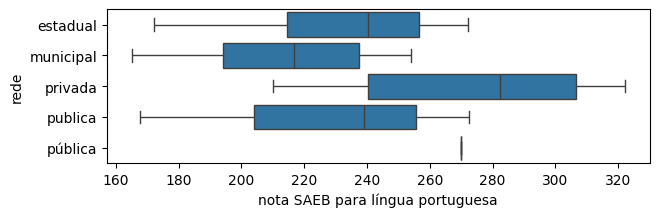

In [11]:
plt.figure(figsize = (7,2))
ax = sns.boxplot(data = dados.query('rede != "total"'), x = 'nota_saeb_lingua_portuguesa', y = 'rede')
ax.set_xlabel('nota SAEB para língua portuguesa')

plt.show()

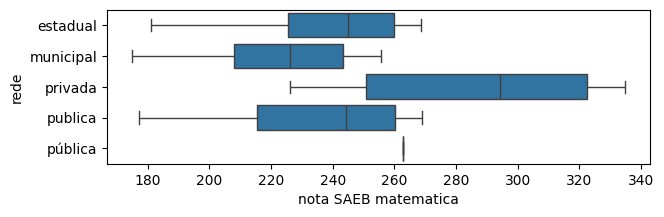

In [12]:
plt.figure(figsize = (7,2))
ax = sns.boxplot(data = dados.query('rede != "total"'), x = 'nota_saeb_matematica', y = 'rede')
ax.set_xlabel('nota SAEB matematica')

plt.show()

Text(0, 0.5, '')

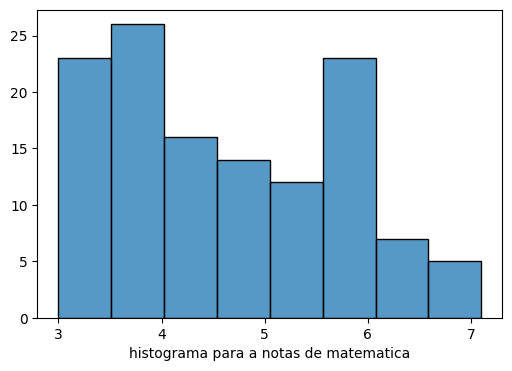

In [13]:
plt.figure(figsize = (6,4))
ax = sns.histplot( data = dados, x = dados['ideb'])
ax.set_xlabel('histograma para a notas de matematica')
ax.set_ylabel('')


Análise

* Primeiramente observamos que há uma inconsistência dentro do nosso dataset, onde que dentr de redes temos algumas linhas com nome 'pública' e 'publica', para isso renomear as células que contém a palavra 'pública'.

* Observando os boxplots para cada rede já podemos observar que as ecolas particulares possuem uma maior nota em relação as demais

* Temos também que as principais colunas que trazem as notas das escolas não apresentam nenhum outlier, então podemos pular aetapa de transoformação dos dados.

## 3.3 Tratando os dados

Após utilziado o .unique( ) foi visto que na coluna rede possuimos a palavra 'pública' e 'publica', nesse caso iremos tratar e trocar as linhas que contém o 'pública' e remover o acento.

In [14]:
# .Query() para puxar somente os dados com nome "pública" dentro da coluna "rede"
dados.query('rede == "pública"')

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
124,2021,pública,medio,todos (1-4),89.8,0.893798,262.71,269.79,4.418034,3.9,NaN


In [15]:
dados['rede'] = dados['rede'].str.replace('pública','publica')

In [16]:
dados['rede'].unique()

array(['estadual', 'municipal', 'privada', 'publica', 'total'],
      dtype=object)

# 4 -  Analisando as notas dos IDEB para cada rede de escola por ano

Inicialmente para realizar a anális das notas do IDEB de cada rede por ano foi necessário fazer um filtro para que pudessemos pegar somente os dados essenciais.

In [17]:
df_filtrado = dados[['ano','rede','ideb','ensino']]
df_filtrado

,ano,rede,ideb,ensino
0,2005,estadual,3.3,fundamental
1,2005,estadual,3.9,fundamental
2,2005,estadual,3.0,medio
3,2005,municipal,3.1,fundamental
4,2005,municipal,3.4,fundamental
...,...,...,...,...
121,2021,privada,6.3,fundamental
122,2021,total,4.2,medio
123,2021,estadual,3.9,medio
124,2021,publica,3.9,medio


In [18]:
dados_filtrados_agrupados = df_filtrado.groupby(['ano','rede']).mean('ideb')
dados_filtrados_agrupados.head()

ideb
ano  rede               
2005 estadual   3.400000
     municipal  3.250000
     privada    5.766667
     publica    3.300000
     total      3.566667

## 4.1 Criando datasets para cada rede

Após a filtração dos dados feitos, foi necessário cirar um dataset separado para cada rede de modo que seja possível a análise separada.

Além disso, o agrupamento das notas do IDEB foi feita com a função "mean", já que possui diferenças de anos finais e iniciais, médio e fundamental ,foi feito a média entre essas notas para represetnar a nota do ano de cada rede

In [19]:
dados['ano'].unique()

array([2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])

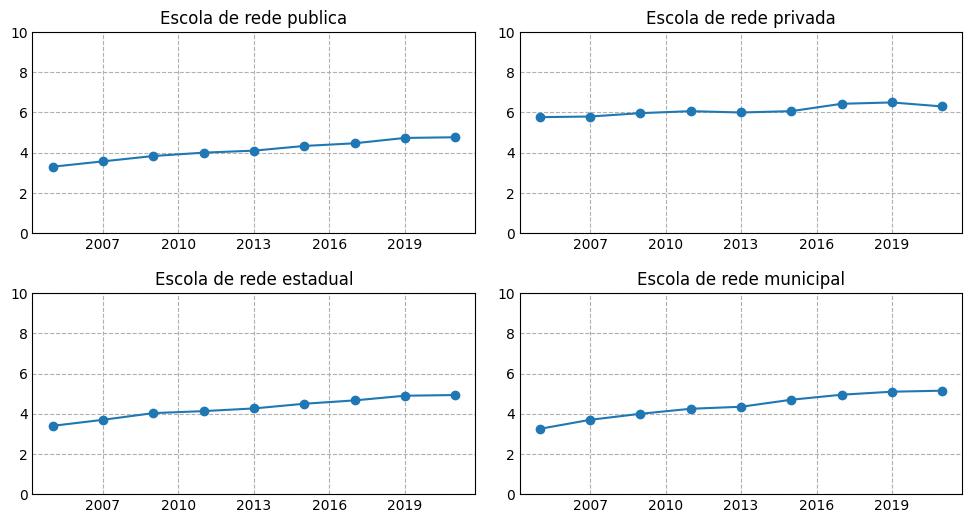

In [20]:


Dic_rede = {0:'publica',
       1:'privada',
       2:'estadual',
       3: 'municipal'}

fig, axs = plt.subplots(2,2,figsize = (12,6))
fig.subplots_adjust(hspace = 0.3, wspace = 0.1)

dic_num = 0
x = [2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]

for i in range(2):
  for j in range(2):
    dados_redes = dados.loc[dados['rede'] == Dic_rede[dic_num]]
    dados_redes_groupby = dados_redes.groupby(dados_redes['ano']).mean('ideb')
    axs[i,j].plot(dados_redes_groupby['ideb'], marker = 'o')
    axs[i,j].set_title(f'Escola de rede {Dic_rede[dic_num]}')
    dic_num +=1


ymax = 10
ymin = 0

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

for i in range(2):
  for j in range(2):
    axs[i,j].grid(True,linestyle = '--')
    axs[i,j].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[i,j].tick_params(axis='both', which='both', length=0)



### Gráfico interativo

Aqui estamos pegandos os dados brutos e selecionando as colunas que queremos trabalhar e retirando os valores que estão relacionado com total dentro da coluna rede

In [21]:
dados.head()
df_lin = dados.query('rede != "total"')[['ano','rede','ideb']]
df_lin.head()

,ano,rede,ideb
0,2005,estadual,3.3
1,2005,estadual,3.9
2,2005,estadual,3.0
3,2005,municipal,3.1
4,2005,municipal,3.4


Para gerar um gráfico de várias váriaveis foi necessário a utilziação de crosstab para fazer um DF com axis ano e rede com valores da nota IDEB, além disso, foi usaddo dentro do agregação a função 'mean' que traz para gente a média dos valores.

In [22]:
# Utilização do crosstab para fazer um novo df só que relacionando o ano com as redes

df_ano_rede = pd.crosstab(index = df_lin['ano'], columns = df_lin['rede'], values = df_lin['ideb'], aggfunc = 'mean')

df_ano_rede

rede,estadual,municipal,privada,publica
ano,,,,
2005,3.400000,3.25,5.766667,3.300000
2007,3.700000,3.70,5.800000,3.566667
2009,4.033333,4.00,5.966667,3.833333
2011,4.133333,4.25,6.066667,4.000000
2013,4.266667,4.35,6.000000,4.100000
2015,4.500000,4.70,6.066667,4.333333
2017,4.666667,4.95,6.433333,4.466667
2019,4.900000,5.10,6.500000,4.733333
2021,4.933333,5.15,6.300000,4.766667


Montando o gráfico

In [23]:
# Criação de um gráfico interativo, importando plotly.expres para criar um gráfico de linhas
import plotly.express as px

fig = px.line(df_ano_rede, x = df_ano_rede.index, y = df_ano_rede.columns, markers = True)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Nota média do IDEB:</b> %{y}")
fig.update_layout(hovermode = "x unified")
fig.update_layout(hovermode="x unified")

fig.update_layout(yaxis = dict(tickformat = '.2f'))


fig.show()

Análise

* Podemos observar que ao longo de todos os anos a escola privada se sobressai em relação as demais escolas, esse fator pode estar relacionado principalmente com o fato que as escolas municipais, privada e pública tem uma limitação em sua verba escolar fornecido pelos governadores, enquanto as escolas particulares tem a possibilidade de ter diversas fontes de receitas além da principal que é a matrícula do aluno, outras rendas como fomentos de terceiros, receitas não planejadas (ex:taxa de atraso do pagamento) e entre outras maneiras.

* Um ponto a ser observado é que apesar das notas do ensino particular ser a maior entre as demais, o mesmo possui a menor variação em relação com o tempo, oque para as demais escolas acontece o invesor onde evidentimente as notas aumentaram ao passar do tempo, esse fato pode estar relacionado com o aumento de verba disponibilizados pelos orgãos como MEC, melhora das estrutura das escolas permitindo acessoas as demais tecnologias e conhecimentos para os alunos, melhor gestão das escolas e entre outras melhorias.


## 4.2 Boxplots das Redes escolares


Aqui já podemos observar como estão se comportando as notas ao longo do tempo podendo observar que as notas IDEB estão aumentando gradativamente com redes de escola publica, estadual e municipal onde todos eles começaram com notas em média de 3,5 e em 2021 estão com notas 5


In [24]:
import plotly.express as px
ax = px.box(dados, x = 'rede',y = 'ideb')

ax.update_xaxes(title_text = 'Rede de escola')
ax.update_yaxes(title_text = 'Nota IDEB')

Outro modo que podemos observar é a partir do boxplots onde é possível análisar a nota do IDEB para cada uma das redes.
A partir disso é possível observar que observando todas as notas do de cada rede, as escolas privadas sempre mantém uma mediana maior em relação aos outras reda, mostrando assim que o nível de escolaridade desse tipo de escola se mantém superior em relação aos demais

# 5 - Teste de hipótese para as notas entre as Redes

Como foi visto, visualmente falando, foi possível observar que as notas das redes privadas se destaca em relação as notas das demais redes, assim, para garantir essa conclusão, será feita um teste de hipótese comparando as notas das redes privadas com as demais

In [25]:
dados['rede'].unique()

array(['estadual', 'municipal', 'privada', 'publica', 'total'],
      dtype=object)

Antes de qualquer anális devemos observar a quantide de indivíduos para cada rede e emseuigda observar se os valores são paramétricos ou não.

In [36]:
redes = dados.query('rede != "total"')['rede'].unique()
print(redes)

numro_redes = []

for name in redes:
  conta = dados.query('rede == @name and rede != "total"').shape[0]
  numro_redes.append(conta)

print(numro_redes)

['estadual' 'municipal' 'privada' 'publica']
[27, 18, 27, 27]


Aqui podemos ver que o numero de elementos é inferior a 30 oque nos diz que existe uma limitação do uso de testes possíveis

In [27]:
dados_teste = dados.query('rede != "total"')

dados_privada = dados_teste.query('rede == "privada"').ideb
dados_publica = dados_teste.query('rede == "publica"').ideb
dados_municipal = dados_teste.query('rede == "municipal"').ideb
dados_estadual = dados_teste.query('rede == "estadual"').ideb

## 5.1 Teste de normalidade

Inicialmente será feita o teste de normalidade das notas IDEB para cada rede, isso para observar a se o teste a ser utilziado será paramétricos ou não paramétricos

H0: temos que a distribuição segue a normalidade

H1: temos que a distribuição não segue a normalidade

In [28]:
from scipy.stats import normaltest

dic_dados_redes = {
    0:dados_privada,
    1:dados_publica,
    2:dados_municipal,
    3:dados_estadual
}

dic_dados_redes2 = {
    0:'rede privada',
    1:'rede publica',
    2:'rede municipal',
    3:'rede estadual'
}


for rede in range(4):
  z,p_valor = normaltest(dic_dados_redes[rede])
  print('O p_valor da {} é rede {}'.format(dic_dados_redes2[rede],p_valor.round(3)))
  if p_valor<= 0.05:
    print('rejeita H0')
  else:
    print('Portanto não há evidências suficientes para rejeitar H0, assim dizemos que a distribuição é normal com 95% de certeza')
  print('--'*60)

O p_valor da rede privada é rede 0.337
Portanto não há evidências suficientes para rejeitar H0, assim dizemos que a distribuição é normal com 95% de certeza
------------------------------------------------------------------------------------------------------------------------
O p_valor da rede publica é rede 0.229
Portanto não há evidências suficientes para rejeitar H0, assim dizemos que a distribuição é normal com 95% de certeza
------------------------------------------------------------------------------------------------------------------------
O p_valor da rede municipal é rede 0.434
Portanto não há evidências suficientes para rejeitar H0, assim dizemos que a distribuição é normal com 95% de certeza
------------------------------------------------------------------------------------------------------------------------
O p_valor da rede estadual é rede 0.194
Portanto não há evidências suficientes para rejeitar H0, assim dizemos que a distribuição é normal com 95% de certeza
------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



Análise

* Como obsevardo nos resultados obtidos no teste de normalidade, temos que todas redes, exceto a rede particular, obteve p_valor maior que 0.05 oque indica a falta de evidências para rejeitar a hipótese nula indicando que as distribuições seguem uma normal. No caso iremos usar o teste paramétricos para análisar as notas das escolas privadas com as demais redes de escolas para obsevar se podemos dizer que há uma diferença de notas estatisticamente relevante.


## 5.2 Testes paramétricos para duas populações

Neste caso, vamos fazer uma análise entre duas populações (rede privada com as demais), assim vamos utilizar da biblioteca Scipy com o teste t independente, já que os o número de indivíduo é menor do que 30 e são notas idependentes entre eles assim será possível a comparação da média das notas entre as populações e definir qual das médias são maior.

Teste de hipótese:

H0: as médias das notas das redes privadas são iguais ou menor que a nota atual analisada

H1: as médias das notas das redes privadas são maiores que a nota atual analisada

Teste Critico com P-valor:

Levando em consideração o nível de significancia igual a 95%:

Rejeitar H0:  p_valor <= 0.05

In [76]:
dic_dados_redes = {
    0:dados_publica,
    1:dados_municipal,
    2:dados_estadual
}


dic_rede = {
  0:'Pública',
  1:'Municipal',
  2:'Estadual'
}


for rede in range(3):
  print(f'Teste para rede {dic_rede[rede]} com a rede Privada')

  t_stat,p_value = stats.ttest_ind(dados_privada,rede)
  print(f'O valor de P = {p_value.round(12)}')
  if p_value > 0.05:
      print("Não há provas suficiente para rejeitar o H0, dizemos que as médias das notas das redes Privadas são iguais ou menor que a nota atual analisada.")
  else:
      print(f"Rejeitamos H0, dizemos que as médias das notas das redes Privadas são maiores que a nota da escola {dic_rede[rede]} analisada.")
  print("---"*30)

Teste para rede Pública com a rede Privada
O valor de P = 8e-12
Rejeitamos H0, dizemos que as médias das notas das redes Privadas são maiores que a nota da escola Pública analisada.
------------------------------------------------------------------------------------------
Teste para rede Municipal com a rede Privada
O valor de P = 3.48e-10
Rejeitamos H0, dizemos que as médias das notas das redes Privadas são maiores que a nota da escola Municipal analisada.
------------------------------------------------------------------------------------------
Teste para rede Estadual com a rede Privada
O valor de P = 2.5205e-08
Rejeitamos H0, dizemos que as médias das notas das redes Privadas são maiores que a nota da escola Estadual analisada.
------------------------------------------------------------------------------------------


Assim, demonstramos estatísticamente que a nota do IDEB das redes privadas são superiores as notas das demais redes.

# 6 - Conclusão

* Observando o gráfico de linhas chegams a conclusão que desde o ínicio da criação do IDEB para metrificar o nível de ensino dos tipos de rede escolares, vimos que a rede particular sempre se sobressaiu em relação aos demais, alguns pontos fora levantados como a quantiade maior de verba recebida a este tipo de rede, enquanto nas demais temos um teto de verba disponibilizado pelo estado ou governo oque pode ser um fator que faz com que a nota dessas redes sejam menores em relação ao particular.

* Chegamos a conclusão que as notas das redes particulares são sim diferentes utilizando métodos estatistico onde as redes escolares municipal, estaduar e públic possuem notas menores as particulares.


* Concluimos tamb;em que ao longo do tempo as notas das redes públicas, estaduais e municipais aumentaram ao longo do tempo, esse aumento pode estar relacionado com aumento de verba disponibilizado pelo governo ao longo do tempo e em conjunto com a melhoria das estruturas das escolas mais a gestão dentro dela pemitindo uma melhor usabilidade da verba.

